<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/CTolbert_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import distance
from sklearn.decomposition import PCA
from mlxtend.plotting import category_scatter
from sklearn.cluster import KMeans

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

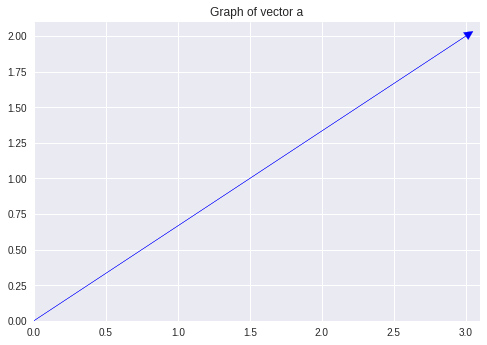

In [77]:
# Define
a = np.array([3,2])

#Plot vector
plt.arrow(0,0, a[0], a[1], head_width=.06, head_length = .06, color ='blue')
plt.xlim(0,3.1)
plt.ylim(0,2.1)
plt.title('Graph of vector a')
plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [78]:
# Define Matrix
b = np.array([17,-4,-2,1])

# Calcualte and print norm of vector
print('The norm of vector b is', LA.norm(b), 'and represents the length of the vector.')

The norm of vector b is 17.60681686165901 and represents the length of the vector.


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [79]:
# Define Matrix
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])

# Calculate the dot product of vector c and d
print(np.dot(c,d))

42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [80]:
# Define matrix
E = np.mat([[7,4,2],
              [1,3,-1],
              [2,6,-4]])

# Inverse of matrix E
print('Inverse of E \n', E.I)


# Transpose of matrix E
print('\n Transpose of E \n',E.T)

Inverse of E 
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

 Transpose of E 
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [81]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [82]:
# Calculate variance
print('Variance of Customers', np.var(customers))
print('Variance of snow', np.var(snow))

Variance of Customers 84653.06122448981
Variance of snow 7.346938775510203


In [83]:
# Look at the mean and std dev.
df.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


 |customers | snow
--- | --- | ---
Mean | 1135.714286 | 2.714286
Variance | 84653.0612244  | 7.3469387
Std Dev |314.264069 | 2.927700



In [84]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

They are comparable because their correlation coefficient is the same, 0.728463. This shows a strong positive linear relationship.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
# Calculate var-cov matrix df^(T)df

In [86]:
# Calculate variance-covariance matrix
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [87]:
# Just double checking to make sure
df.var()

customers    98761.904762
snow             8.571429
dtype: float64

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [88]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Country,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,England,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,Wales,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,Scotland,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,North Ireland,209,93,674,1033,143,586,355,187,334,1506,139


In [89]:
# Only numeric columns in dataframe for pasing to PCA

X = df.drop('Country', axis=1)
X.head()

,Alcoholic Drinks,Beverages,Carcass_Meat,Cereals,Cheese,Confectionery,Fats_and_Oils,Fish,Fresh_Fruit,Fresh_Potatoes,Fresh_Veg,Other_Meat,Other_Veg,Processed_Potatoes,Processed_Veg,Soft_Drinks,Sugars
0,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
1,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175
2,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
3,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139


In [90]:
# We'll also turn the X dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_X = X.values
print(numpy_X)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]]


In [91]:
from sklearn import preprocessing

numpy_Xscaled = preprocessing.scale(numpy_X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [92]:
numpy_Xscaled

array([[ 0.10499766, -0.05191741, -0.01749546, -0.64432226,  0.65827466,
        -0.13830319, -0.63242919,  0.64458535,  0.73740709, -0.45007561,
         0.86331183, -0.25954622,  0.37773603, -0.33626508,  0.80547723,
        -0.43523112,  0.13055067],
       [ 0.84182336,  1.60943981, -1.27716878,  1.67946294,  0.53580495,
         0.96812236,  1.53589947,  1.15244047,  0.9292974 ,  0.43569619,
         1.09352832,  1.19885635,  1.40168163,  0.08406627,  1.17160324,
        -1.40423624,  1.54795798],
       [ 0.71656299, -0.46725672, -0.22744102, -0.85557546,  0.53580495,
         0.74683725, -1.09707105, -0.33205912, -0.0575671 , -1.33584741,
        -0.70983418,  0.54381113, -0.49636387,  1.51319287, -0.87870243,
         1.19072664, -0.54085279],
       [-1.66338402, -1.09026568,  1.52210526, -0.17956522, -1.72988456,
        -1.57665641,  0.19360077, -1.4649667 , -1.60913739,  1.35022682,
        -1.24700598, -1.48312126, -1.28305378, -1.26099406, -1.09837804,
         0.64874072

In [93]:
numpy_Xscaled.mean(axis=0)

array([ 0.00000000e+00, -5.55111512e-17,  0.00000000e+00,  6.93889390e-18,
        0.00000000e+00,  5.55111512e-17,  6.93889390e-18,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.55111512e-17,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.55111512e-17, -2.77555756e-17,
       -5.55111512e-17])

In [94]:
numpy_Xscaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(numpy_X))


StandardScaler(copy=True, with_mean=True, with_std=True)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [96]:
print(scaler.mean_)

[ 360.75   57.5   245.25 1502.5    94.25   55.25  205.25  130.5   967.5
  798.25  208.    706.    457.75  202.    349.   1427.    154.25]


In [97]:
numpy_X_scaled = scaler.transform(numpy_X)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [98]:
print(numpy_X_scaled)
#print(scaler.transform([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]))

[[ 0.10499766 -0.05191741 -0.01749546 -0.64432226  0.65827466 -0.13830319
  -0.63242919  0.64458535  0.73740709 -0.45007561  0.86331183 -0.25954622
   0.37773603 -0.33626508  0.80547723 -0.43523112  0.13055067]
 [ 0.84182336  1.60943981 -1.27716878  1.67946294  0.53580495  0.96812236
   1.53589947  1.15244047  0.9292974   0.43569619  1.09352832  1.19885635
   1.40168163  0.08406627  1.17160324 -1.40423624  1.54795798]
 [ 0.71656299 -0.46725672 -0.22744102 -0.85557546  0.53580495  0.74683725
  -1.09707105 -0.33205912 -0.0575671  -1.33584741 -0.70983418  0.54381113
  -0.49636387  1.51319287 -0.87870243  1.19072664 -0.54085279]
 [-1.66338402 -1.09026568  1.52210526 -0.17956522 -1.72988456 -1.57665641
   0.19360077 -1.4649667  -1.60913739  1.35022682 -1.24700598 -1.48312126
  -1.28305378 -1.26099406 -1.09837804  0.64874072 -1.13765587]]


In [99]:
# Calculate the mean of the standardization
np.mean(numpy_X_scaled).round()

-0.0

In [100]:
# Calculate the std of the standardization
np.std(numpy_X_scaled)

1.0

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
# Create PCA instance
pca = PCA(2)

In [102]:
# Fit on data
pca.fit(numpy_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [103]:
# Find eigenvalues and eigenvectors
print('Eigenvalues: \n', pca.components_)
print('\n Eigenvectors: \n', pca.explained_variance_)

Eigenvalues: 
 [[-0.46396817 -0.02618776  0.04792763 -0.04770286 -0.05695538 -0.0296502
  -0.00519362 -0.08441498 -0.6326409   0.40140206 -0.15184994 -0.25891666
  -0.24359373 -0.02688623 -0.03648827  0.23224414 -0.03762098]
 [ 0.11353652 -0.03056054  0.01391582 -0.21259968  0.01601285  0.00594992
  -0.09538866 -0.05075495 -0.17774074 -0.71501708 -0.14490027 -0.01533114
  -0.22545092  0.04285076 -0.0454518   0.55512431 -0.0430217 ]]

 Eigenvectors: 
 [105073.34576714  45261.62487597]


In [104]:
nx = pca.transform(numpy_X)
print('Projected Data: \n', nx)

Projected Data: 
 [[-144.99315218   -2.53299944]
 [-240.52914764 -224.64692488]
 [ -91.869339    286.08178613]
 [ 477.39163882  -58.90186182]]


In [116]:
nx_final = pd.DataFrame(nx, columns=['PC1', 'PC2'])
nx_final


,PC1,PC2
0,-144.993152,-2.532999
1,-240.529148,-224.646925
2,-91.869339,286.081786
3,477.391639,-58.901862


In [0]:
nx_final['Country'] = df['Country']

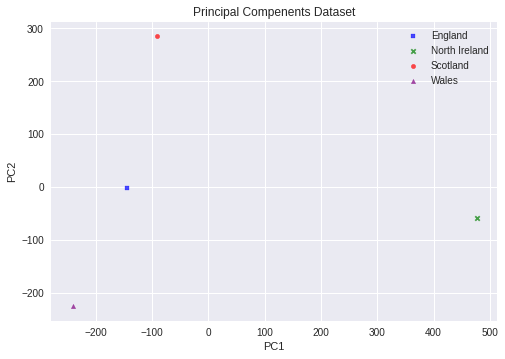

In [119]:
fig = category_scatter(data=nx_final, x ='PC1', y='PC2', label_col = 'Country')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Compenents Dataset')
plt.show()



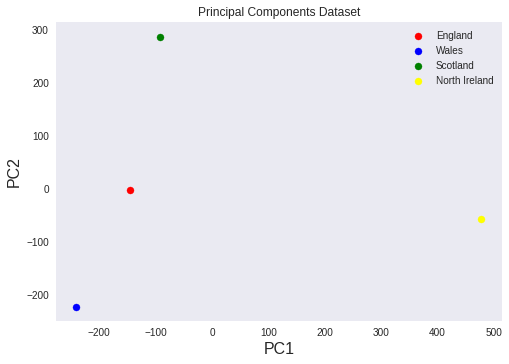

In [123]:
# CAN'T FIGURE THIS GRAPHING THING OUT...UGGHHH
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize=16)
ax.set_ylabel('PC2', fontsize=16)
ax.set_title('Principal Components Dataset')
targets=["England","Wales","Scotland","North Ireland"]
colors = ['red', 'blue', 'green', 'yellow', 'pink']
for target, color in zip(targets, colors):
  indicesToKeep = nx_final['Country'] == target
  ax.scatter(nx_final.loc[indicesToKeep, 'PC1']
               , nx_final.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [124]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
# We'll also turn the dataframe into an numpy array for you in case 
# you're more familiar with using numpy arrays ;)

# You may choose which one you would rather use.

# Feel free to change the variable names if you don't like mine.

numpy_points = points.values
print(numpy_points)

In [0]:
# 5 observations for every 2
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

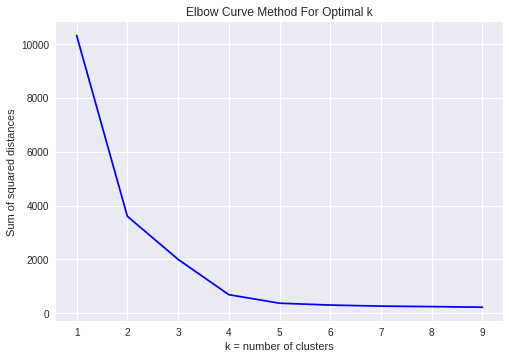

In [127]:
# Look at the elbow curve
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k = number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Curve Method For Optimal k')
plt.show()

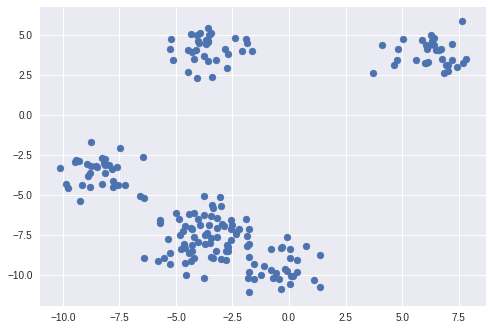

In [128]:
# Visualize data
plt.scatter('x','y', data=points)
plt.show();

In [138]:
# Eyeball method says 4 or 5, but we will go for 5
# KMeans using 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
labels = kmeans.labels_

print(labels)

[3 1 4 3 4 1 3 3 2 1 1 1 4 1 3 4 3 1 1 0 3 0 0 0 1 1 4 2 1 1 1 1 4 0 1 1 1
 1 2 4 4 0 2 2 2 1 1 1 3 4 0 3 3 2 0 4 1 2 2 3 0 4 3 2 0 2 0 2 3 2 1 1 1 1
 0 0 1 1 2 0 2 1 1 1 2 1 2 1 1 0 2 1 0 1 4 1 1 1 1 4 1 1 3 1 1 0 3 3 3 0 4
 0 1 3 4 1 2 2 0 2 0 4 1 3 1 3 1 0 2 3 4 3 1 3 2 2 4 0 3 1 2 1 1 0 4 2 1 2
 3 1 1 4 3 0 1 2 4 0 1 3 4 1 2 3 0 0 4 2 4 4 3 4 2 0 4 1 1 1 1 3 1 4 1 1 4
 1 3 0 2 4 1 3 0 3 1 2 0 0 4 4]


In [136]:
# Add labels to dataframe
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head()


,x,y,clusters
0,-7.846803,-3.421277,3
1,-3.554323,-6.884729,4
2,-0.192822,-9.671030,0
3,-6.401456,-5.223972,3
4,-0.804026,-9.704457,0


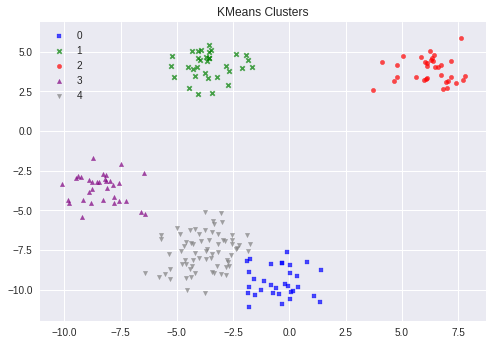

In [137]:
fig = category_scatter(x='x', y='y', label_col='clusters', data=points)
plt.title('KMeans Clusters')
plt.show()